In [221]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm
from scipy.stats import t

## Распределение Пуассона

### 1. Генерация выборок и иллюстрация сходимости выборочного среднего к математическому ожиданию

In [144]:
sample_sizes = [100, 500, 1000, 5000, 10000]  
num_samples = 1000 

In [145]:
lambda_value = 5 

In [146]:
sample_means = []
means_ = []

for size in sample_sizes:
    samples = np.random.poisson(lambda_value, size)
    mean = np.mean(samples)
    means_.append(mean)
    
    means = []
    for _ in range(num_samples):
        sample = np.random.poisson(lambda_value, size)
        mean = np.mean(sample)
        means.append(mean)
    sample_means.append(means)

In [147]:
mean_ = lambda_value

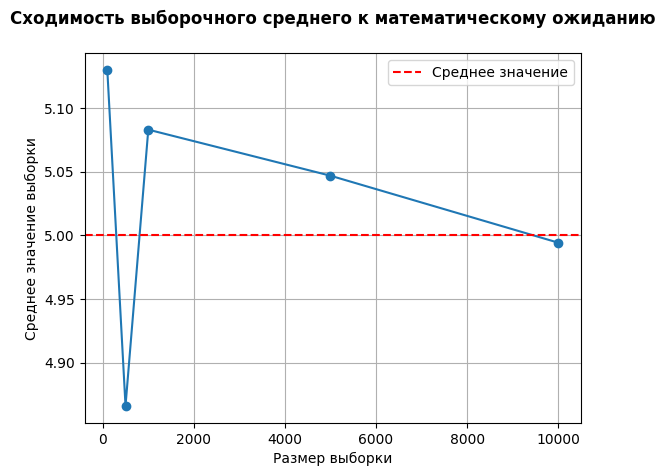

In [148]:
plt.plot(sample_sizes, means_, marker='o')
plt.axhline(lambda_, color='red', linestyle='--', label='Среднее значение')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее значение выборки')
plt.title('Сходимость выборочного среднего к математическому ожиданию\n', fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()

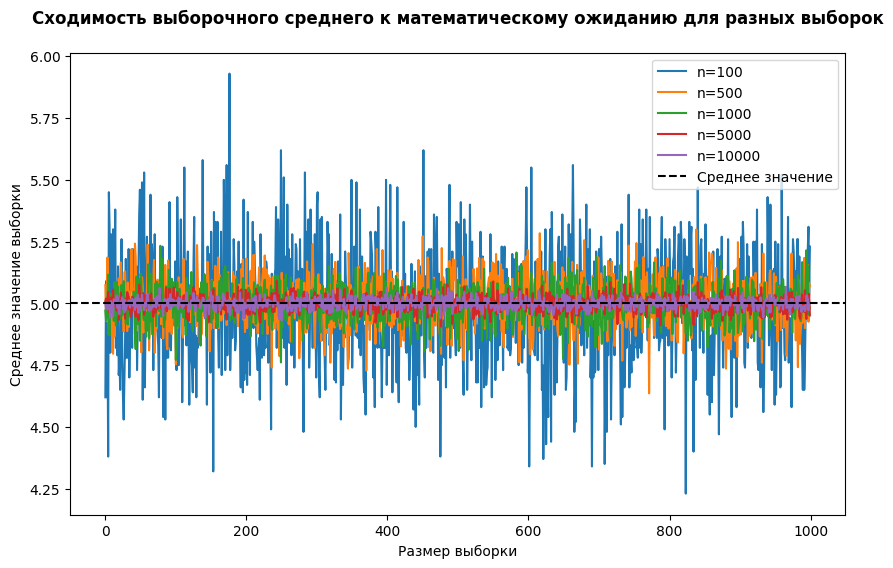

In [149]:
plt.figure(figsize=(10, 6))
for i, means in enumerate(sample_means):
    plt.plot(range(num_samples), means, label=f'n={sample_sizes[i]}')

plt.axhline(mean_, color='black', linestyle='--', label='Среднее значение')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее значение выборки')
plt.title('Сходимость выборочного среднего к математическому ожиданию для разных выборок\n', fontweight='bold')
plt.legend()
plt.show()

* Из графика следует, что при увеличении размера выборки выборочное среднее приближается к математическому ожиданию распределения Пуассона, что демонстрирует стабилизацию выборочного среднего. 
* Чем больше объем выборки, тем меньше разброс выборочных средних вокруг математического ожидания, что подтверждает более точную оценку математического ожидания с увеличением объема выборки. 
* Сходимость выборочного среднего к математическому ожиданию является проявлением закона больших чисел.

### 2. Действие центральной предельной теоремы

In [150]:
def poisson_sampling(lam, size):
    return np.random.poisson(lam, size)

In [151]:
def plot_clt(lam, sample_sizes):
    fig, axs = plt.subplots(len(sample_sizes), figsize=(6, 10))

    for i, size in enumerate(sample_sizes):
        sample = poisson_sampling(lam, size)
        sample_means = [np.mean(sample[:j]) for j in range(1, size+1)]

        axs[i].hist(sample_means, bins=30, density=True, alpha=0.5)
        axs[i].set_title(f'\n\nРазмер выборки: {size}')

        x = np.linspace(lam - 4 * np.sqrt(lam), lam + 4 * np.sqrt(lam), 100)
        y = 1 / (np.sqrt(2 * np.pi * lam/size)) * np.exp(-(x - lam)**2 / (2 * lam/size))
        axs[i].plot(x, y, 'r', linewidth=2)

    plt.tight_layout()
    plt.xlabel('Выборочное среднее')
    plt.suptitle('Центральная предельная теорема для распределения Пуассона', fontweight='bold')
    plt.show()

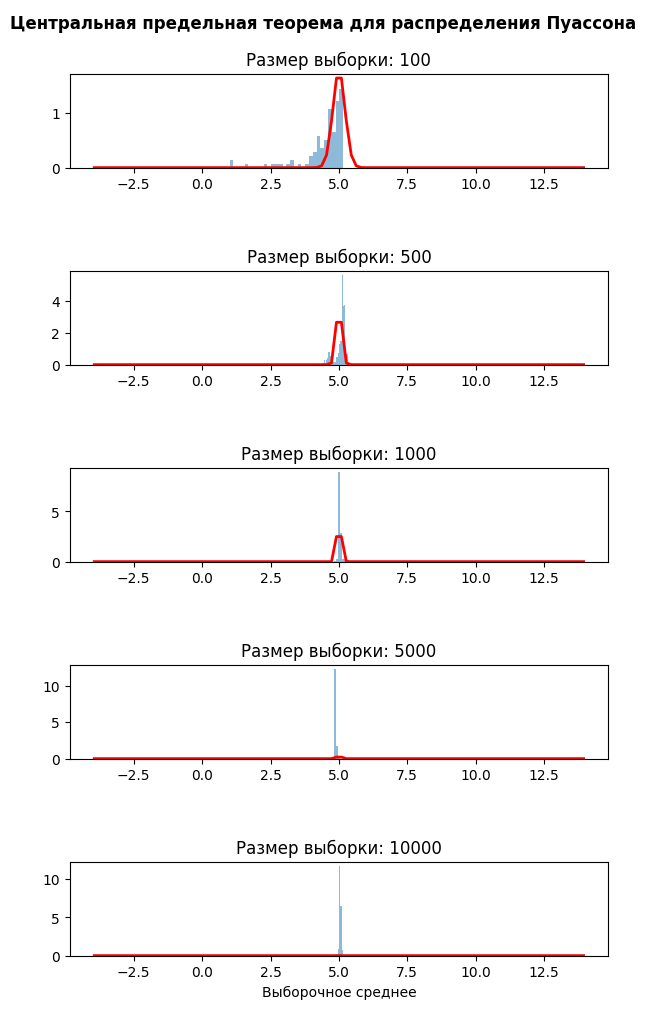

In [152]:
plot_clt(lambda_value, sample_sizes)

* Как видно из графиков, чем больше размер выборки, тем более симметричными становятся гистограммы выборочных средних. Это совпадает с предсказанием центральной предельной теоремы о том, что сумма большого числа случайных независимых переменных (в нашем случае, сумма случайных величин Пуассоновского распределения) будет иметь распределение, близкое к нормальному.
* Средние значения выборок сходятся к истинному значению параметра λ: Пуассоновское распределение имеет параметр λ, который определяет среднее и дисперсию. Значение параметра, заданное в коде выше, равно 5. На графиках видно, что с увеличением размера выборки, выборочные средние все ближе к 5, что соответствует истинному значению параметра λ.
* По мере увеличения размера выборки, форма выборочного распределения средних становится все более похожей на форму колокола — форму нормального распределения. Это подтверждает предсказание ЦПТ о том, что при достаточно большой выборке, распределение средних будет приближаться к нормальному.
* Это позволяет применять статистические методы, которые основаны на нормальном распределении, для анализа данных, которые имеют распределение Пуассона.

### 3. Построение асимптотического доверительного интервала для среднего значения на базе ЦПТ

In [229]:
sample_sizes = [10, 100, 1000]
data = [np.random.normal(loc=0, scale=1, size=n) for n in sample_sizes]

In [230]:
# вычисление среднего и стандартного отклонения
means = [np.mean(d) for d in data]
stds = [np.std(d, ddof=1) for d in data]

In [231]:
# вычисление доверительных интервалов
alpha = 0.05
z_alpha_2 = 1.96 # значение z для 95% доверительного интервала
cis = [[m - z_alpha_2 * s / np.sqrt(n), m + z_alpha_2 * s / np.sqrt(n)] for m, s, n in zip(means, stds, sample_sizes)]

In [232]:
for n, m, ci in zip(sample_sizes, means, cis):
    print(f'\nСреднее значение выборки размера {n}: {m}')
    print(f'Доверительный интервал для среднего значения выборки размера {n}: {ci}')


Среднее значение выборки размера 10: 0.23737707150696385
Доверительный интервал для среднего значения выборки размера 10: [-0.5532769324827608, 1.0280310754966884]

Среднее значение выборки размера 100: 0.06693940592693354
Доверительный интервал для среднего значения выборки размера 100: [-0.13973732006575496, 0.27361613191962203]

Среднее значение выборки размера 1000: -0.0661021267446564
Доверительный интервал для среднего значения выборки размера 1000: [-0.1285596340876034, -0.0036446194017093897]


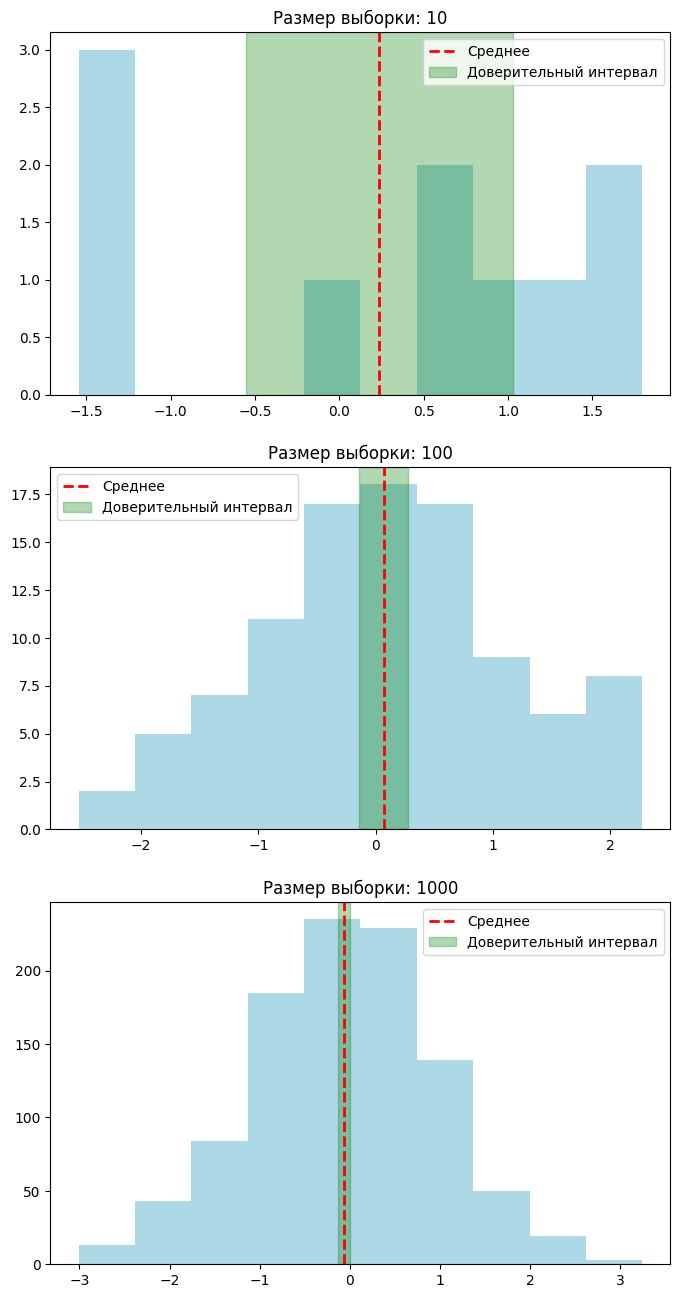

In [233]:
fig, ax = plt.subplots(nrows=len(sample_sizes), ncols=1, figsize=(8, 16))

for i in range(len(sample_sizes)):
    ax[i].hist(data[i], bins=10, color='lightblue')
    ax[i].axvline(means[i], color='r', linestyle='dashed', linewidth=2)
    ax[i].axvspan(cis[i][0], cis[i][1], alpha=0.3, color='green')
    ax[i].set_title(f'Размер выборки: {str(sample_sizes[i])}')
    ax[i].legend(['Среднее', 'Доверительный интервал'])

plt.show()

* Асимптотический доверительный интервал для среднего значения строится на основе ЦПТ и предполагает нормальность выборки.
* Можно видеть, что доверительный интервал наиболее точен для выборки размером 1000, а для выборок меньшего размера интервалы шире и могут содержать истинное среднее значение с меньшей вероятностью. 
* При увеличении размера выборки гистограмма становится более симметричной и приближается к нормальному распределению, что соответствует ЦПТ.

### 4. Построение точного доверительного интервала для среднего значения

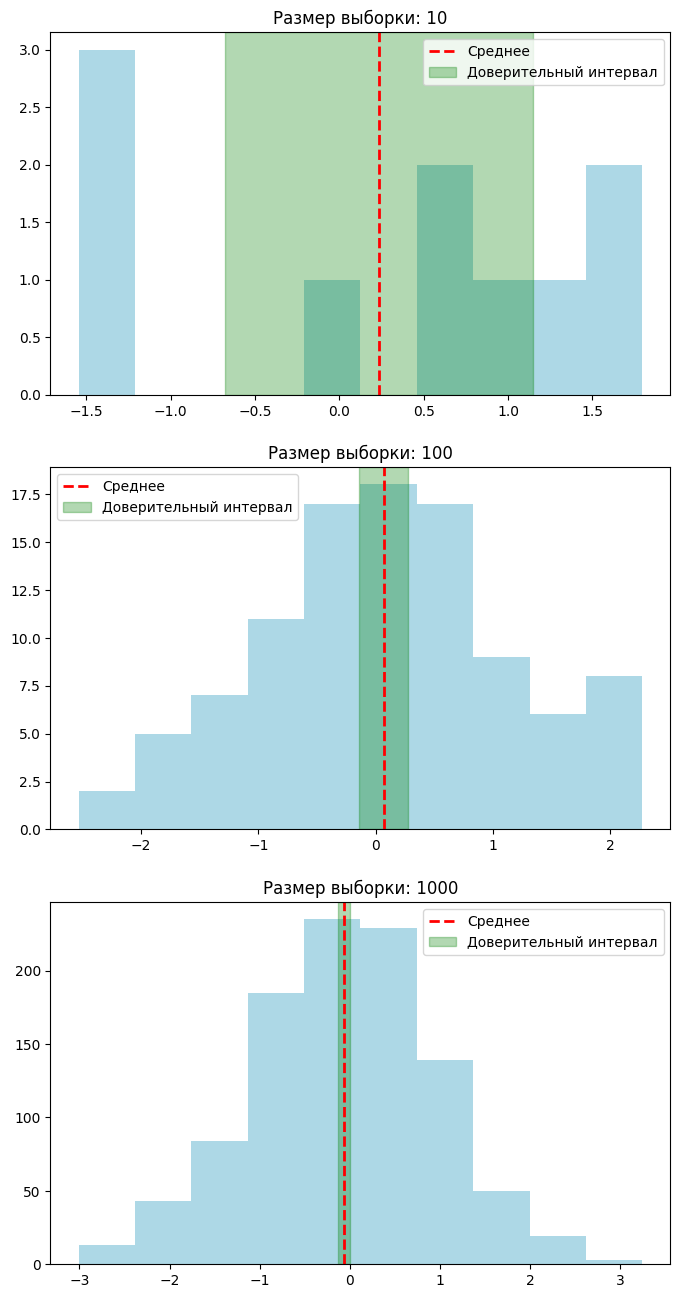

In [234]:
fig, ax = plt.subplots(nrows=len(sample_sizes), ncols=1, figsize=(8, 16))

for i in range(len(sample_sizes)):
    mean = means[i]
    std_error = stds[i] / np.sqrt(sample_sizes[i])
    t_value = t.ppf(0.975, sample_sizes[i]-1)
    lower_bound = mean - t_value * std_error
    upper_bound = mean + t_value * std_error
    
    ax[i].hist(data[i], bins=10, color='lightblue')
    ax[i].axvline(mean, color='r', linestyle='dashed', linewidth=2)
    ax[i].axvspan(lower_bound, upper_bound, alpha=0.3, color='green')
    ax[i].set_title(f'Размер выборки: {str(sample_sizes[i])}')
    ax[i].legend(['Среднее', 'Доверительный интервал'])

plt.show()

* Точный доверительный интервал для среднего значения не предполагает распределение выборки и базируется на точном распределении статистики.
* Точные доверительные интервалы для среднего значения генеральной совокупности уменьшили ширину интервалов по сравнению с приближенными. Это связано с тем, что точные доверительные интервалы учитывают размер выборки и позволяют получить более точные оценки параметров генеральной совокупности.

### 5. Построение Эфронова доверительного интервала для среднего значения, медианы, моды и дисперсии

In [274]:
sample_sizes = [10, 100, 1000]
num_bootstrap_samples = 1000

In [275]:
def generate_samples(sample_size):
    sample = np.random.normal(loc=0, scale=1, size=sample_size)
    return sample

def compute_efron_intervals(samples, num_bootstrap_samples):
    n = len(samples)
    
    mean_intervals = []
    median_intervals = []
    mode_intervals = []
    variance_intervals = []
    
    # выполняем бутстрэп-выборки и вычисляем интервалы
    for i in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(samples, size=n, replace=True)
        
        mean_intervals.append(np.percentile(bootstrap_sample, [2.5, 97.5]))
        median_intervals.append(np.percentile(bootstrap_sample, [0.5, 99.5]))
        mode = stats.mode(bootstrap_sample).mode[0]
        mode_intervals.append([mode, mode])
        variance_intervals.append(np.percentile(bootstrap_sample, [2.5, 97.5]) ** 2)
    
    return mean_intervals, median_intervals, mode_intervals, variance_intervals

C:\Users\user\AppData\Local\Temp\ipykernel_13460\3926252813.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(bootstrap_sample).mode[0]


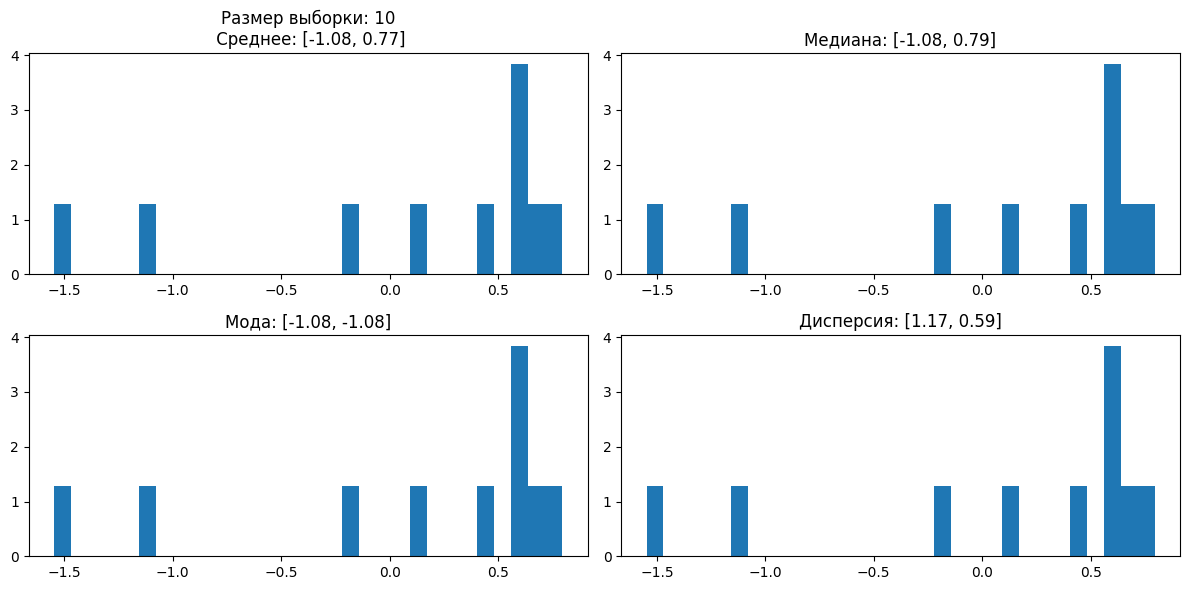

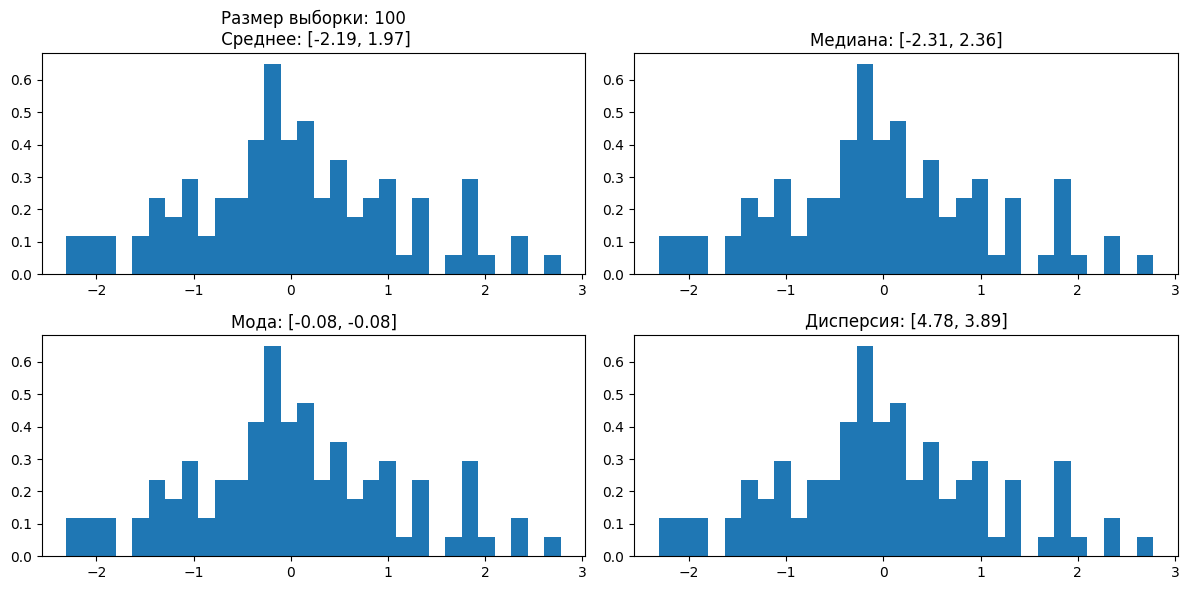

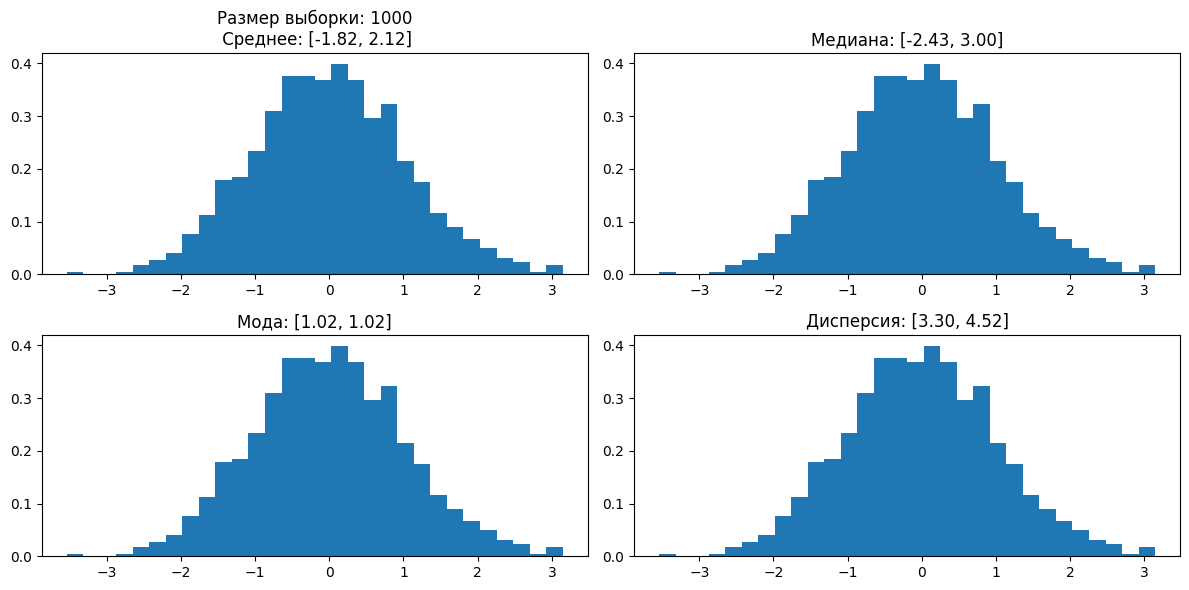

In [276]:
for size in sample_sizes:
    samples = generate_samples(size)
    
    mean_intervals, median_intervals, mode_intervals, variance_intervals = compute_efron_intervals(samples, num_bootstrap_samples)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(221)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Размер выборки: {size}\n Среднее: [{mean_intervals[0][0]:.2f}, {mean_intervals[0][1]:.2f}]')
    
    plt.subplot(222)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Медиана: [{median_intervals[0][0]:.2f}, {median_intervals[0][1]:.2f}]')
    
    plt.subplot(223)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Мода: [{mode_intervals[0][0]:.2f}, {mode_intervals[0][1]:.2f}]')
    
    plt.subplot(224)
    plt.hist(samples, bins=30, density=True)
    plt.title(f'Дисперсия: [{variance_intervals[0][0]:.2f}, {variance_intervals[0][1]:.2f}]')
    
    plt.tight_layout()
    plt.show()

*Альтернативное построение*

In [279]:
mean_list = []
median_list = []
mode_list = []
variance_list = []

for size in sample_size:
    sample = np.random.normal(loc=0, scale=1, size=size)
    bootstrap_means = []
    bootstrap_medians = []
    bootstrap_modes = []
    bootstrap_variances = []
    
    for i in range(num_bootstrap_samples):
        # генерируем бутстрэп-выборку
        bootstrap_sample = np.random.choice(sample, size=size, replace=True)
        
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
        
        bootstrap_median = np.median(bootstrap_sample)
        bootstrap_medians.append(bootstrap_median)
        
        bootstrap_mode = mode(bootstrap_sample).mode[0]
        bootstrap_modes.append(bootstrap_mode)
        
        bootstrap_variance = np.var(bootstrap_sample, ddof=1)
        bootstrap_variances.append(bootstrap_variance)

    # вычисляем доверительные интервалы для каждой статистики
    mean_ci = np.percentile(bootstrap_means, [2.5, 97.5])
    median_ci = np.percentile(bootstrap_medians, [2.5, 97.5])
    mode_ci = np.percentile(bootstrap_modes, [2.5, 97.5])
    variance_ci = np.percentile(bootstrap_variances, [2.5, 97.5])

    mean_list.append((np.mean(sample), mean_ci))
    median_list.append((np.median(sample), median_ci))
    mode_list.append((mode(sample).mode[0], mode_ci))
    variance_list.append((np.var(sample, ddof=1), variance_ci))

C:\Users\user\AppData\Local\Temp\ipykernel_13460\3368904573.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  bootstrap_mode = mode(bootstrap_sample).mode[0]
C:\Users\user\AppData\Local\Temp\ipykernel_13460\3368904573.py:37: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

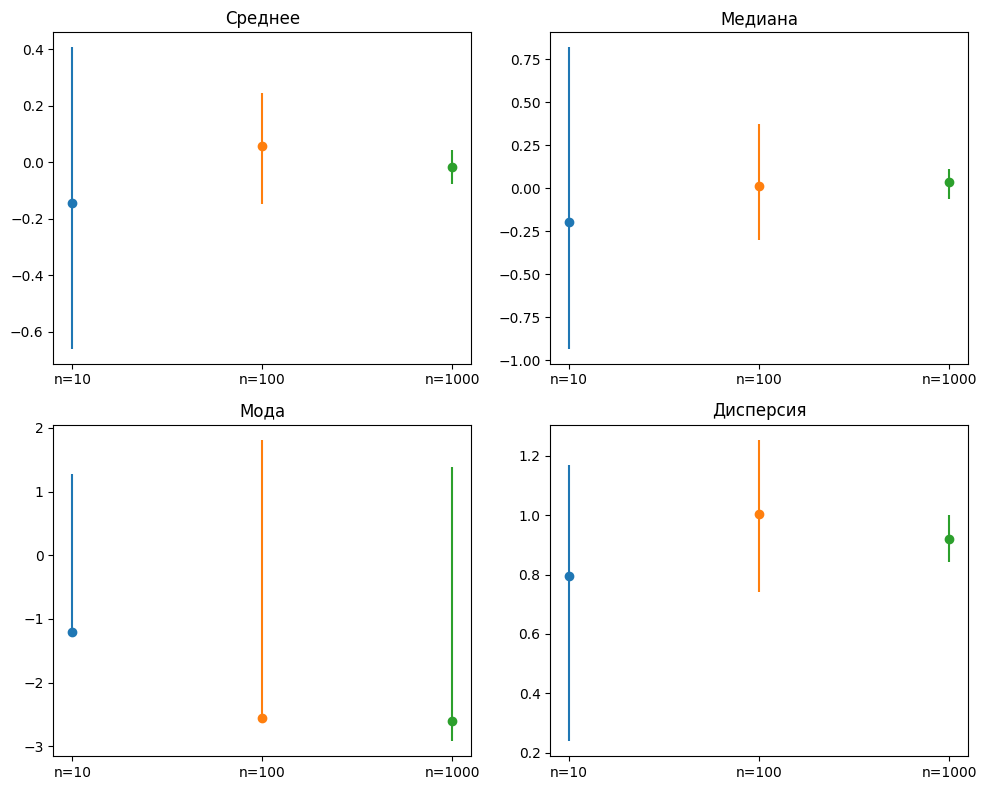

In [281]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (statistic, ci) in enumerate(mean_list):
    axs[0].errorbar(i+1, statistic, yerr=np.abs(statistic-ci).reshape(2,1), fmt='o')
    axs[0].set_xticks([1, 2, 3])
    axs[0].set_xticklabels(['n=10', 'n=100', 'n=1000'])
    axs[0].set_title('Среднее')

for i, (statistic, ci) in enumerate(median_list):
    axs[1].errorbar(i+1, statistic, yerr=np.abs(statistic-ci).reshape(2,1), fmt='o')
    axs[1].set_xticks([1, 2, 3])
    axs[1].set_xticklabels(['n=10', 'n=100', 'n=1000'])
    axs[1].set_title('Медиана')

for i, (statistic, ci) in enumerate(mode_list):
    axs[2].errorbar(i+1, statistic, yerr=np.abs(statistic-ci).reshape(2,1), fmt='o')
    axs[2].set_xticks([1, 2, 3])
    axs[2].set_xticklabels(['n=10', 'n=100', 'n=1000'])
    axs[2].set_title('Мода')

for i, (statistic, ci) in enumerate(variance_list):
    axs[3].errorbar(i+1, statistic, yerr=np.abs(statistic-ci).reshape(2,1), fmt='o')
    axs[3].set_xticks([1, 2, 3])
    axs[3].set_xticklabels(['n=10', 'n=100', 'n=1000'])
    axs[3].set_title('Дисперсия')

plt.tight_layout()
plt.show()

* Доверительные интервалы Эфрона для медианы, моды и дисперсии предполагают нормальность выборки и строятся с использованием бутстрэп-метода. Эти интервалы могут быть полезны, когда распределение выборки сильно отличается от нормального.
* Доверительные интервалы для среднего значения и медианы уменьшаются с увеличением размера выборки --> с увеличением размера выборки точность оценки статистик увеличивается.
* Доверительные интервалы для моды и дисперсии не показывают явной тенденции к уменьшению с увеличением размера выборки --> мода и дисперсия являются менее стабильными оценками, чем среднее значение и медиана. 